# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results
Partial Points: Partially correct code or results
No Points: Did not attempt the problem or did not upload any solution




In [90]:
# Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd


# We are going to use Ticker module, wich allow us to acess ticker data:

# is ticker simbol is TSLA

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

In [91]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [92]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
# Step 1: Get the HTML data from the webpage
url = "https://companiesmarketcap.com/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse the HTML content using BeautifulSoup
content = BeautifulSoup(html_data, "html.parser")

# Inspect the page to identify the table and class attributes for extracting revenue data.
table = content.find("table", {"class": "table"})

In [93]:
table = content.find("table", {"class": "table"})
table
rows = table.find_all("tr")
revenue_data = []

for row in rows[1:]:  # Skipping the header row
    cols = row.find_all("td")
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    revenue_data.append({"Year": year, "Revenue": revenue})

# Step 6: Convert the extracted data into a DataFrame
tesla_revenue = pd.DataFrame(revenue_data)
print(tesla_revenue.tail())

    Year  Revenue
11  2013  $2.01 B
12  2012  $0.41 B
13  2011  $0.20 B
14  2010  $0.11 B
15  2009  $0.11 B


In [94]:
# Question 3: Extracting GameStop Stock Data Using yfinance -

# Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.
# Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

gmestop=yf.Ticker("GME")
gme_data = gmestop.history(period="max")

# To reset the index: use reset_index(inplace=True)
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [95]:
url= "https://companiesmarketcap.com/gamestop/revenue"
gme_data =requests.get(url).text

In [96]:
gme_data

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>GameStop\r\n (GME) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel

In [97]:
content = BeautifulSoup(gme_data,"html.parser")
content

<!DOCTYPE html>

<html lang="en-US">
<head>
<title>GameStop
 (GME) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/

In [98]:

table = content.find("table", {"class": "table"})  # Adjust class if necessary

# Step 5: Extract rows from the table
rows = table.find_all("tr")
revenue_data = []

In [99]:
for row in rows[1:]:  # Skipping the header row
    cols = row.find_all("td")
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    revenue_data.append({"Year": year, "Revenue": revenue})

# Step 7: Convert the data into a DataFrame
gme_revenue = pd.DataFrame(revenue_data)

# Step 8: Display the last five rows of the DataFrame
print(gme_revenue.tail())

    Year  Revenue
19  2005  $3.09 B
20  2004  $1.84 B
21  2003  $1.57 B
22  2002  $1.35 B
23  2001  $1.12 B


# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [100]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf


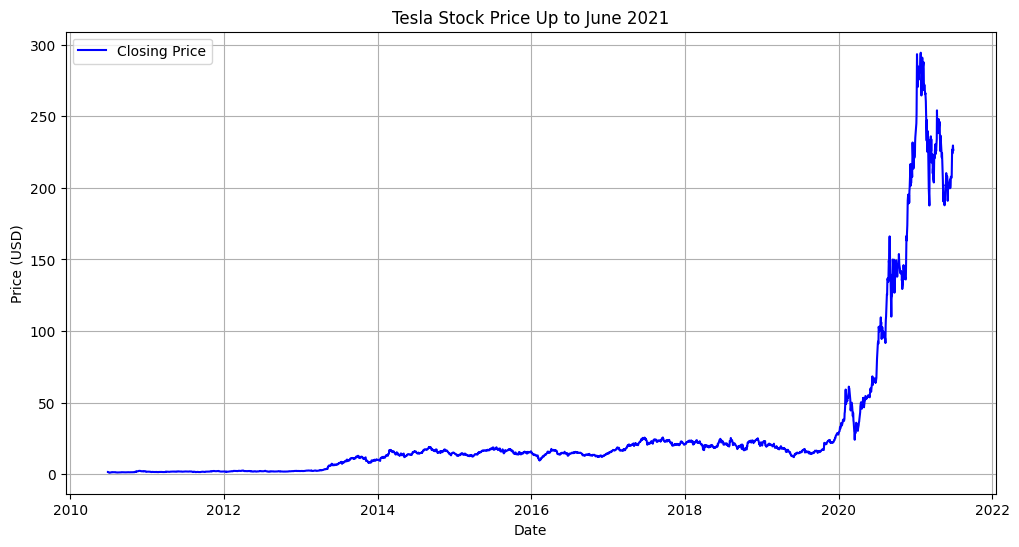

,Year,Revenue
0,2024 (TTM),$97.15 B
1,2023,$96.77 B
2,2022,$81.46 B
3,2021,$53.82 B
4,2020,$31.53 B
5,2019,$24.57 B
6,2018,$21.46 B
7,2017,$11.75 B
8,2016,$7.00 B
9,2015,$4.04 B


In [105]:
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_data_filtered, title='Tesla Stock Price Up to June 2021')


# Question 6: Plot GameStop Stock Graph

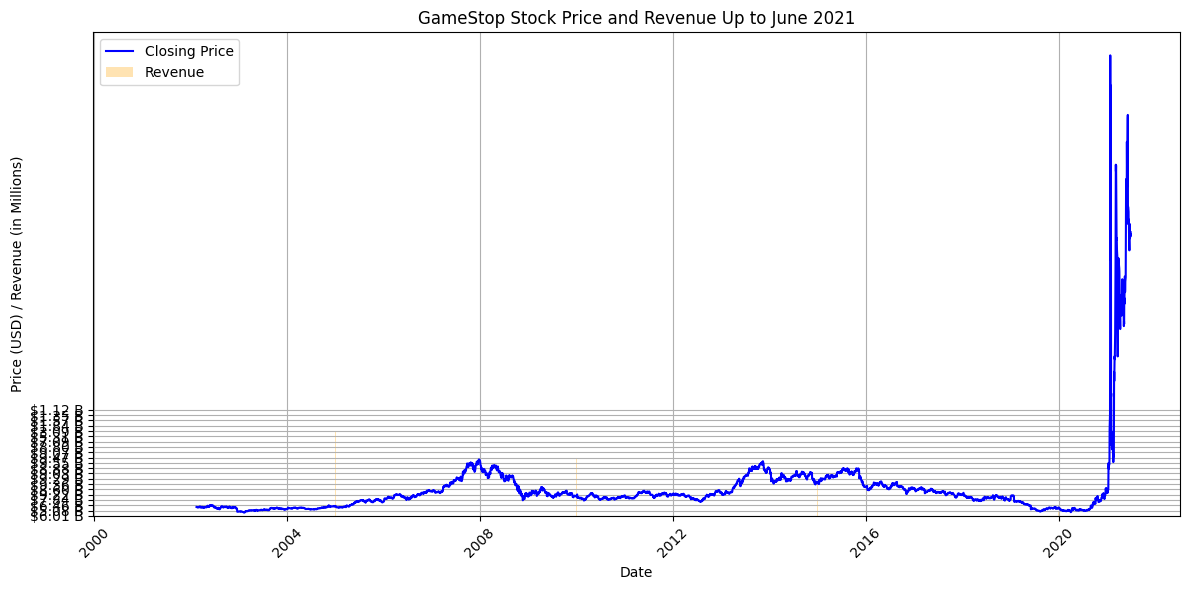

In [103]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))

    # Plot stock closing price
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')

    # Plot revenue as a bar chart
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], alpha=0.3, label='Revenue', color='orange')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD) / Revenue (in Millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

gme_revenue.rename(columns={'Year': 'Date'}, inplace=True)
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop Stock Price and Revenue Up to June 2021')
